#    TITANIC CASE STUDY

#      

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading testing and training data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# looking at train and test data
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# getting information about columns in training and testing data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# finding null values in training and testing dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# filling the null values in column Age 
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# dropping columns that are not required or having more number of null values
train_df = train_df.drop(['Name' , 'Ticket', 'Cabin'],axis=1)
test_df = test_df.drop(['Name' ,'Ticket', 'Cabin'],axis=1)

In [13]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [15]:
# defining a function for mapping values of object type into float type
def binary_map(x):
    return x.map({'S': 1, 'C': 2, 'Q': 3 })
var = ['Embarked']
train_df[var] = train_df[var].apply(binary_map)

test_df[var] = test_df[var].apply(binary_map)

In [16]:
train_df = train_df[~np.isnan(train_df['Embarked'])]

In [17]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
# filling the null value in column Fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [19]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 69.5+ KB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [22]:
# defining function for transformig sex column into int type from object type
def transform_sex(x):
     return x.map({'male': 1, 'female': 2 })

In [23]:
# transformig sex column into int type from object type
var2 = ['Sex']
train_df[var2] = train_df[var2].apply(transform_sex)
test_df[var2] = test_df[var2].apply(transform_sex)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null float64
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [26]:
# converting the float type into int type
train_df = train_df.astype({'Age': 'int64' , 'Fare': 'int64' , 'Embarked': 'int64'})

In [27]:
test_df = test_df.astype({'Age': 'int64' , 'Fare': 'int64' })

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null int64
Embarked       889 non-null int64
dtypes: int64(9)
memory usage: 69.5 KB


In [29]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
dtypes: int64(8)
memory usage: 26.2 KB


In [30]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [31]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
# importing scaler for scaling data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
col2 = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']

In [33]:
train_df[Col] = sc.fit_transform(train_df[Col])
test_df[col2] = sc.fit_transform(test_df[col2])

In [34]:
train_x = train_df.drop(['Survived', 'PassengerId'],axis=1 )

In [35]:
train_y = train_df["Survived"]

In [36]:
# Applying logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
# importing rfe
from sklearn.feature_selection import RFE

In [38]:
# applying rfe
rfe = RFE(lr,8)

In [39]:
rfe = rfe.fit(train_x, train_y)

In [40]:
rfe.support_
col = train_x.columns[rfe.support_]

In [41]:

import statsmodels.api as sm
train_x_sm = sm.add_constant(train_x[col])
lm = sm.GLM(train_y, train_x_sm, family = sm.families.Binomial())

In [42]:
res = lm.fit()

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.82
Date:                Sat, 29 Aug 2020   Deviance:                       785.64
Time:                        20:18:26   Pearson chi2:                     909.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0712      0.368      2.914      0.004       0.351       1.792
Pclass        -2.2421      0.283     -7.928      0.000      -2.796      -1.688
Sex            2.7092      0.200     13.564      0.000       2.318       3.101
Age           -3.1776      0.625     -5.087      0.000      -4.402      -1.953
SibSp         -2.6259      0.868     -3.024      0.002      -4.328      -0.924
Parch         -0.5020      0.709     -0.708      0.479      -1.891       0.887
Fare           1.1196      1.206      0.929      0.353      -1.243       3.483
Embarked       0.4916      0.284      1.733      0.083      -0.064       1.048
==============================================================================
"""

In [44]:
# predicting training data
pred_y = res.predict(train_x_sm)

In [45]:
pred_y

0      0.086462
1      0.912447
2      0.627374
3      0.898247
4      0.072861
         ...   
886    0.250897
887    0.956535
888    0.495235
889    0.586585
890    0.126196
Length: 889, dtype: float64

In [46]:
pred_y = pred_y.values.reshape(-1)

In [47]:
pred_y

array([0.08646197, 0.91244667, 0.62737436, 0.8982474 , 0.07286102,
       0.14505076, 0.27645088, 0.09340413, 0.57997143, 0.88958075,
       0.73156389, 0.82252469, 0.1247982 , 0.03233544, 0.73058717,
       0.62476208, 0.10988164, 0.24350625, 0.50454683, 0.66536766,
       0.20050189, 0.20231806, 0.81024845, 0.50889519, 0.54937635,
       0.34304082, 0.11692036, 0.43526264, 0.71770065, 0.09383363,
       0.44700804, 0.94809722, 0.71770065, 0.06602263, 0.51397182,
       0.30755986, 0.11692036, 0.12052414, 0.5513938 , 0.71583404,
       0.41120918, 0.78661714, 0.11692036, 0.91529677, 0.78424203,
       0.09401973, 0.11037769, 0.71770065, 0.06612574, 0.63003224,
       0.0595112 , 0.12029254, 0.87190413, 0.77489287, 0.22880421,
       0.50889519, 0.86379266, 0.11692036, 0.88332115, 0.03503601,
       0.14385855, 0.29672945, 0.08145427, 0.5655868 , 0.08193541,
       0.82191824, 0.12920155, 0.35392106, 0.0550677 , 0.21433502,
       0.30893941, 0.32644487, 0.09488349, 0.08952683, 0.10446

In [48]:
fn_train = pd.DataFrame({'Survived': train_y.values, 'Probability': pred_y}) 

In [49]:
fn_train

,Survived,Probability
0,0.0,0.086462
1,1.0,0.912447
2,1.0,0.627374
3,1.0,0.898247
4,0.0,0.072861
...,...,...
884,0.0,0.250897
885,1.0,0.956535
886,0.0,0.495235
887,1.0,0.586585


In [50]:
fn_train['Prediction'] = fn_train.Probability.map(lambda x: 1 if x>0.65 else 0)

In [51]:
fn_train

,Survived,Probability,Prediction
0,0.0,0.086462,0
1,1.0,0.912447,1
2,1.0,0.627374,0
3,1.0,0.898247,1
4,0.0,0.072861,0
...,...,...,...
884,0.0,0.250897,0
885,1.0,0.956535,1
886,0.0,0.495235,0
887,1.0,0.586585,0


In [52]:
# importing library for analysis of prediction of training data
from sklearn import metrics

In [53]:
# creating confusion matrix
cf = metrics.confusion_matrix(fn_train.Survived, fn_train.Prediction)

In [54]:
cf 

array([[519,  30],
       [133, 207]], dtype=int64)

In [55]:
print(metrics.accuracy_score(fn_train.Survived, fn_train.Prediction))

0.8166479190101237


In [56]:
# finding mid value
n = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
for i in n:
    fn_train[i] = fn_train.Probability.map(lambda x: 1 if x>i else 0)

In [57]:
fn_train

,Survived,Probability,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.086462,0,1,0,0,0,0,0,0,0,0,0
1,1.0,0.912447,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.627374,0,1,1,1,1,1,1,1,0,0,0
3,1.0,0.898247,1,1,1,1,1,1,1,1,1,1,0
4,0.0,0.072861,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.250897,0,1,1,1,0,0,0,0,0,0,0
885,1.0,0.956535,1,1,1,1,1,1,1,1,1,1,1
886,0.0,0.495235,0,1,1,1,1,1,0,0,0,0,0
887,1.0,0.586585,0,1,1,1,1,1,1,0,0,0,0


In [58]:
df1 = pd.DataFrame(columns = ['Prd', 'Acc', 'Sens', 'Spec'])
for i in n:
    cf2 = metrics.confusion_matrix(fn_train.Survived , fn_train[i])
    tot = sum(sum(cf2))
    Acc = (cf2[0,0]+cf2[1,1])/tot
    Spec = cf2[0,0]/(cf2[0,0]+cf2[0,1])
    Sens = cf2[1,1]/(cf2[1,0]+cf2[1,1])
    df1.loc[i] = [i, Acc, Sens, Spec]
print(df1)

     Prd       Acc      Sens      Spec
0.0  0.0  0.382452  1.000000  0.000000
0.1  0.1  0.554556  0.932353  0.320583
0.2  0.2  0.713161  0.852941  0.626594
0.3  0.3  0.773903  0.820588  0.744991
0.4  0.4  0.788526  0.755882  0.808743
0.5  0.5  0.799775  0.714706  0.852459
0.6  0.6  0.814398  0.647059  0.918033
0.7  0.7  0.803150  0.544118  0.963570
0.8  0.8  0.758155  0.382353  0.990893
0.9  0.9  0.696288  0.211765  0.996357


In [59]:
# plotting graph between accuracy,senstivity, specificity to prediction
import matplotlib.pyplot as plt
df1.plot.line(x='Prd', y=['Acc','Sens','Spec'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [60]:
# importing library for precision and recall
from sklearn.metrics import precision_recall_curve

In [61]:
fn_train.Survived,fn_train.Prediction

(0      0.0
 1      1.0
 2      1.0
 3      1.0
 4      0.0
       ... 
 884    0.0
 885    1.0
 886    0.0
 887    1.0
 888    0.0
 Name: Survived, Length: 889, dtype: float64, 0      0
 1      1
 2      0
 3      1
 4      0
       ..
 884    0
 885    1
 886    0
 887    0
 888    0
 Name: Prediction, Length: 889, dtype: int64)

In [62]:
pre, rcl, mid_value = precision_recall_curve(fn_train.Survived,fn_train.Probability)

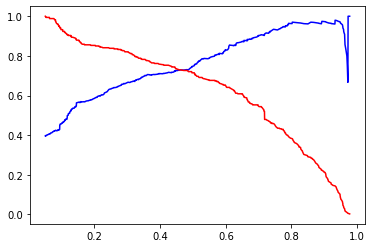

In [63]:
# plotting graph of precision and recall
plt.plot(mid_value, pre[:-1], "b-")
plt.plot(mid_value, rcl[:-1], "r-")
plt.show()

In [64]:
# testing model
test_x = test_df
test_x = test_x[col]
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.447368,0.000,0.000000,0.013672,1.0
1,1.0,1.0,0.618421,0.125,0.000000,0.013672,0.0
2,0.5,0.0,0.815789,0.000,0.000000,0.017578,1.0
3,1.0,0.0,0.355263,0.000,0.000000,0.015625,0.0
4,1.0,1.0,0.289474,0.125,0.111111,0.023438,0.0


In [65]:
test_x_rs = sm.add_constant(test_x)
test_pred_y = res.predict(test_x_rs)
test_pred_y

0      0.110510
1      0.323084
2      0.106137
3      0.092605
4      0.564826
         ...   
413    0.092605
414    0.932879
415    0.060407
416    0.092605
417    0.083949
Length: 418, dtype: float64

In [66]:
# reading csv
sol = pd.read_csv("gender_submission.csv")

In [67]:
test_y = sol["Survived"]
test_y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [68]:
test_y_df = pd.DataFrame(test_y)
test_y_df['PassengerId'] = test_y_df.index
test_pred_y1 = pd.DataFrame(test_pred_y)
test_pred_y1.reset_index(drop = True , inplace = True)
test_y_df.reset_index(drop = True , inplace = True)
fn_test = pd.concat([test_y_df, test_pred_y1], axis = 1)
fn_test

,Survived,PassengerId,0
0,0,0,0.110510
1,1,1,0.323084
2,0,2,0.106137
3,0,3,0.092605
4,1,4,0.564826
...,...,...,...
413,0,413,0.092605
414,1,414,0.932879
415,0,415,0.060407
416,0,416,0.092605


In [69]:
fn_test = fn_test.rename(columns = {0 : 'Probability'})
fn_test

,Survived,PassengerId,Probability
0,0,0,0.110510
1,1,1,0.323084
2,0,2,0.106137
3,0,3,0.092605
4,1,4,0.564826
...,...,...,...
413,0,413,0.092605
414,1,414,0.932879
415,0,415,0.060407
416,0,416,0.092605


In [70]:
mm = (0.38+0.48)/2
fn_test['Prediction'] = fn_test.Probability.map(lambda x: 1 if x>mm else 0)
fn_test

,Survived,PassengerId,Probability,Prediction
0,0,0,0.110510,0
1,1,1,0.323084,0
2,0,2,0.106137,0
3,0,3,0.092605,0
4,1,4,0.564826,1
...,...,...,...,...
413,0,413,0.092605,0
414,1,414,0.932879,1
415,0,415,0.060407,0
416,0,416,0.092605,0


In [71]:
# analysis of testing 
metrics.accuracy_score(fn_test.Survived , fn_test.Prediction)

0.9282296650717703

In [72]:
cf2 = metrics.confusion_matrix(fn_test.Survived, fn_test.Prediction)

In [73]:
cf2

array([[241,  25],
       [  5, 147]], dtype=int64)

In [74]:
sensitivity = cf2[1,1]/float(cf2[1,1]+cf2[1,0])
sensitivity

0.9671052631578947

In [75]:
specificity = cf2[0,0]/float(cf2[0,0]+cf2[0,1])
specificity

0.9060150375939849

In [76]:
f1 = (2*sensitivity*specificity)/(sensitivity+specificity)
f1

0.9355639475004621

In [77]:
# Generating csv file
sol['Survived']=fn_test['Prediction']
sol.to_csv (r'export_dataframe.csv', index = False, header=True)